In [1]:
#import libraries 
import pandas as pd
import numpy as np
import hypertools as hyp
import seaborn as sns
%matplotlib notebook

In [4]:
#load in the data

fname = 'At Risk Students For Dartmouth.xlsx'
sheet1 = 'Year 16-17'
sheet2 = 'Year 17-18 9.25.17'
columns = ('id', 'grade', 'age', 'school', 'sex', 'homeless', 'disadvantaged', 'specialneeds',
           'excused1', 'unexcused1', 'tardy1',
           'excused2', 'unexcused2', 'tardy2',
           'excused3', 'unexcused3', 'tardy3',
           'excused4', 'unexcused4', 'tardy4')
y1_data = pd.read_excel(fname, sheetname=sheet1, skiprows=[0], names=columns)
y2_data = pd.read_excel(fname, sheetname=sheet2, skiprows=[0], names=columns)

#do some data cleaning

#use student IDs as the index
y1_data.set_index('id', inplace=True)
y2_data.set_index('id', inplace=True)

#in "disadvantaged" column, replace "YES" with 1 and NaN with 0
y1_data['disadvantaged'] = y1_data['disadvantaged'].map({np.nan: 0, 'YES': 1})
y2_data['disadvantaged'] = y2_data['disadvantaged'].map({np.nan: 0, 'YES': 1})

#in "specialneeds" column, 
y1_data['specialneeds'] = y1_data['specialneeds'].map({np.nan: 0, 504: '504', 'IEP': 'IEP'})
y2_data['specialneeds'] = y2_data['specialneeds'].map({np.nan: 0, 504: '504', 'IEP': 'IEP'})

#replace '---' with 0 (Fourth marking period columns)
y1_data.replace('---', 0, inplace=True)
y2_data.replace('---', 0, inplace=True)

In [5]:
y1_data['sum_absent'] = y1_data.excused1 + y1_data.unexcused1 + y1_data.excused2 + y1_data.unexcused2 + y1_data.excused3 + y1_data.unexcused3 +y1_data.excused4 + y1_data.unexcused4

# High School Analysis 

In [95]:
#high school data set
grade9 = y1_data['grade'] == 9
grade10 = y1_data['grade'] == 10
grade11 = y1_data['grade'] == 11
grade12 = y1_data['grade'] == 12

hs_students = y1_data.loc[grade9 | grade10 | grade11 | grade12]

<IPython.core.display.Javascript object>


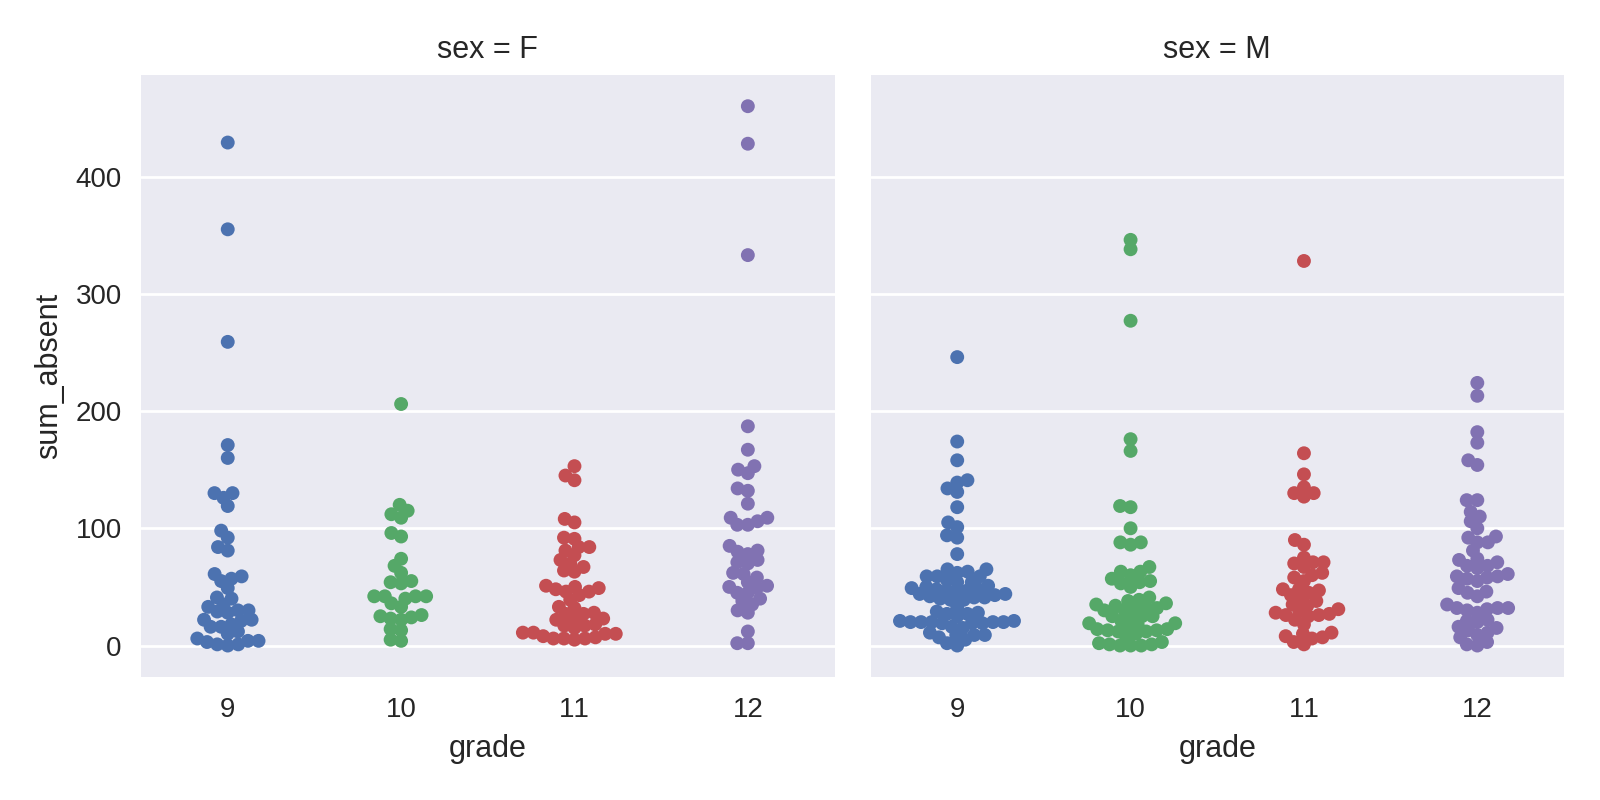

<IPython.core.display.Javascript object>


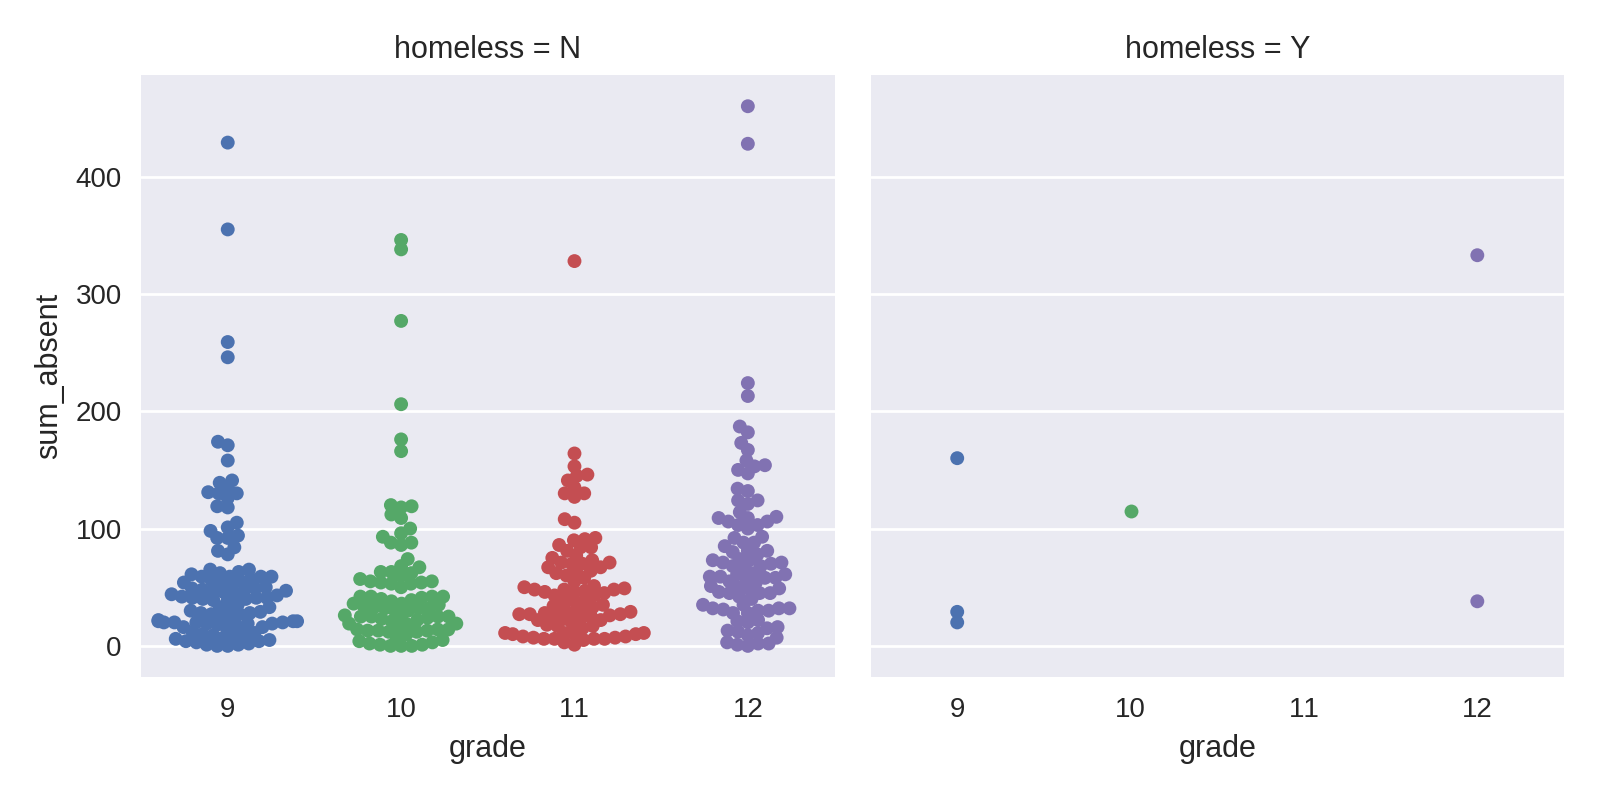

<IPython.core.display.Javascript object>


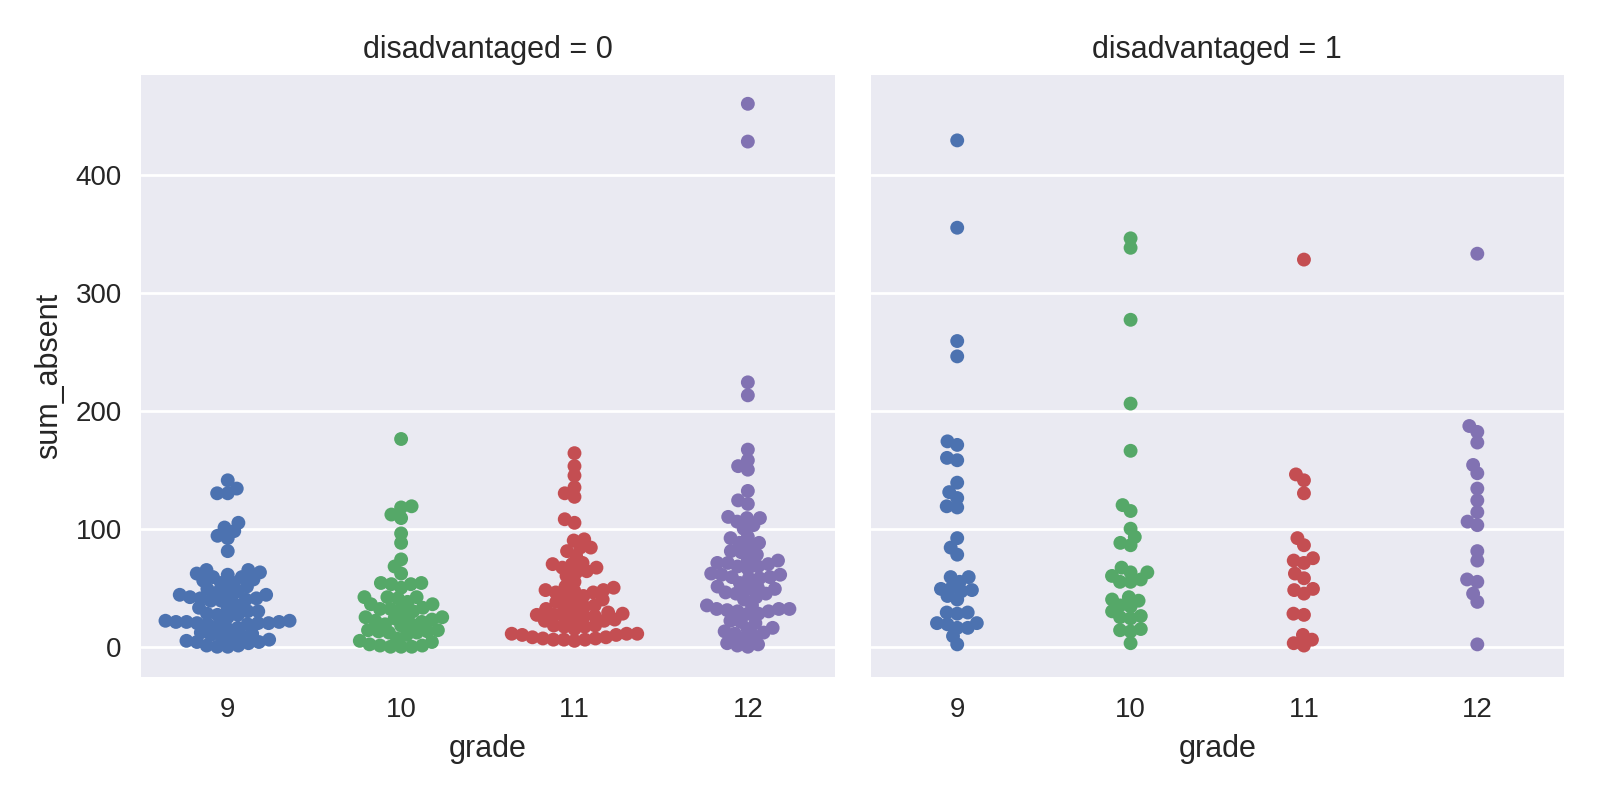

<IPython.core.display.Javascript object>


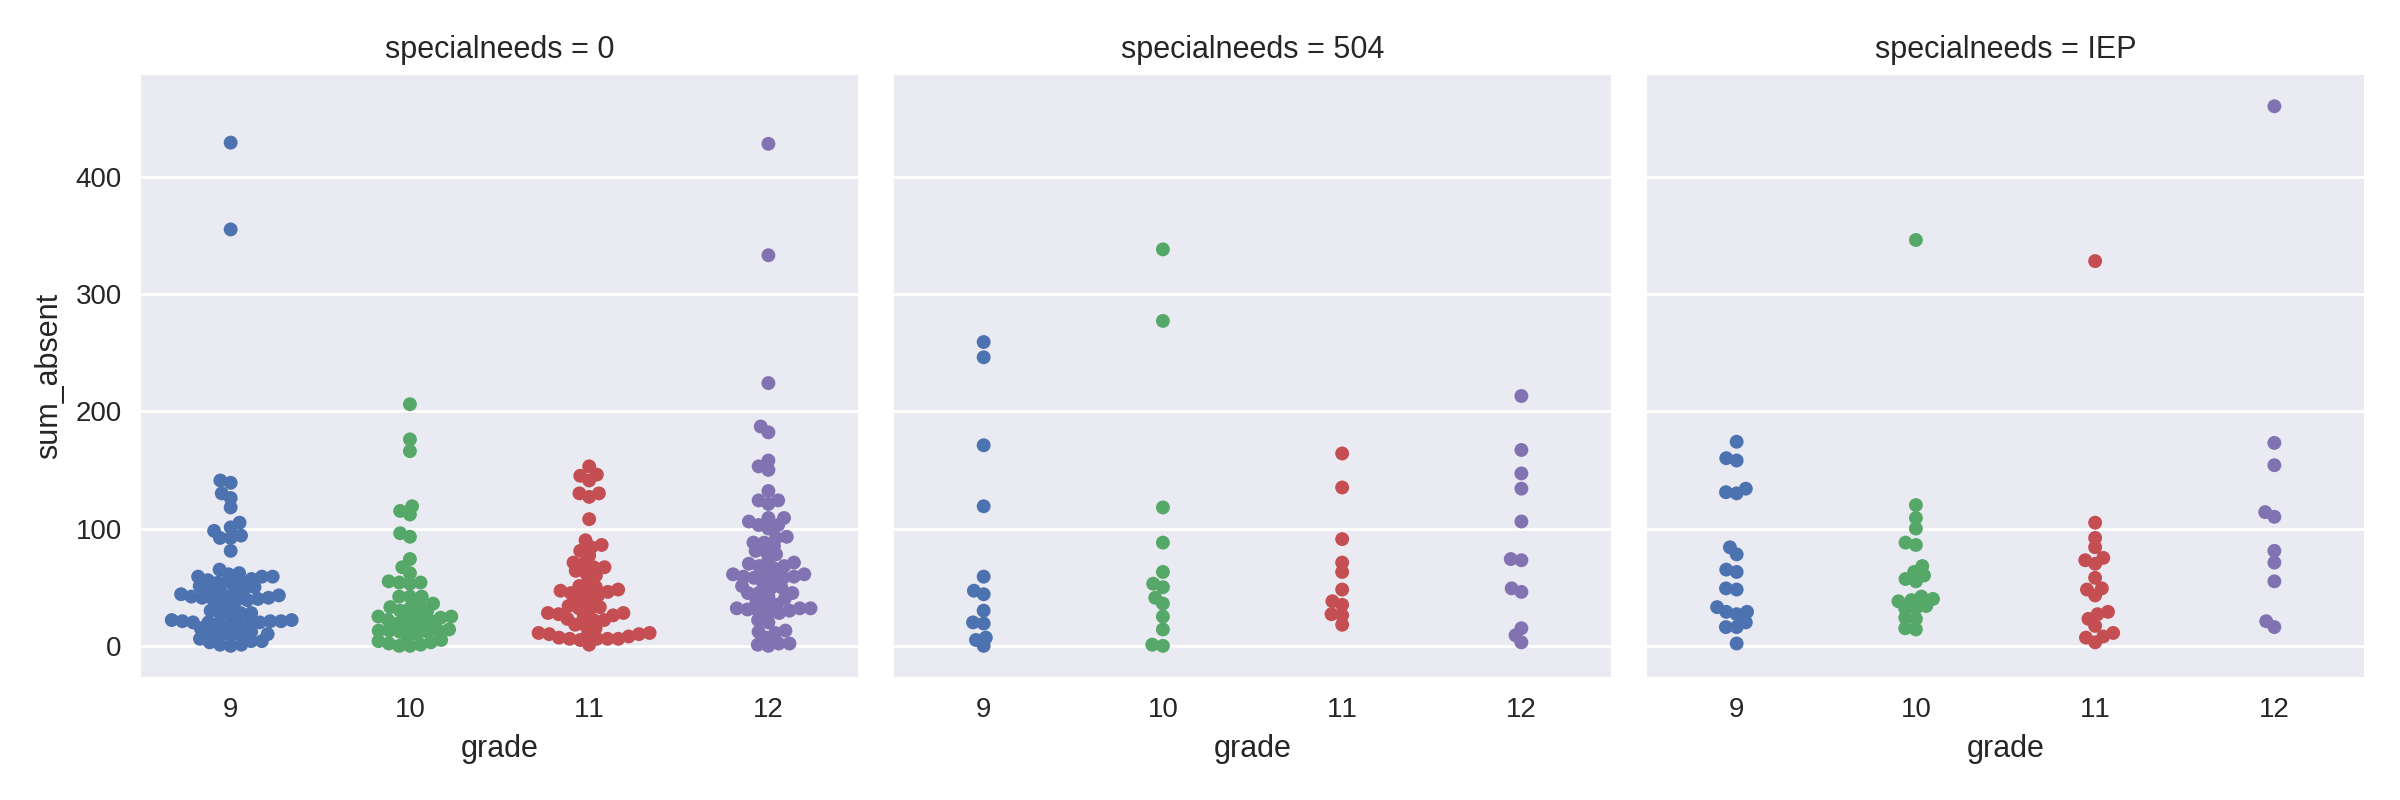

In [97]:
#high school plots 
for p in ['sex', 'homeless', 'disadvantaged', 'specialneeds']:
    sns.factorplot(data=hs_students, x="grade", y="sum_absent",
               col=p, kind="swarm")

# Middle School Analysis 

In [94]:
#high school data set
grade6 = y1_data['grade'] == 6
grade7 = y1_data['grade'] == 7
grade8 = y1_data['grade'] == 8

ms_students = y1_data.loc[grade6 | grade7 | grade8]

<IPython.core.display.Javascript object>


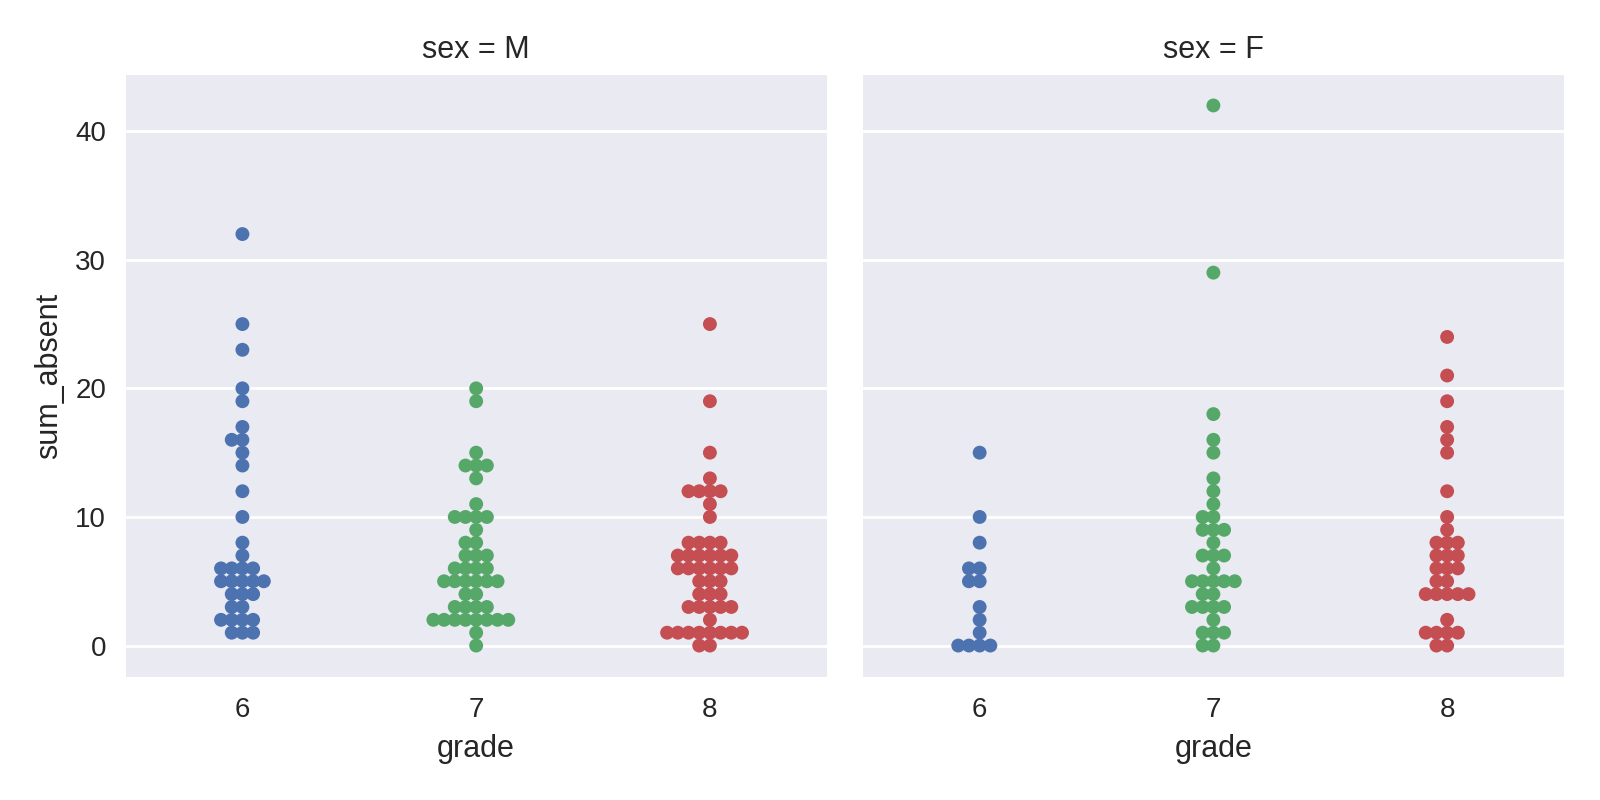

<IPython.core.display.Javascript object>


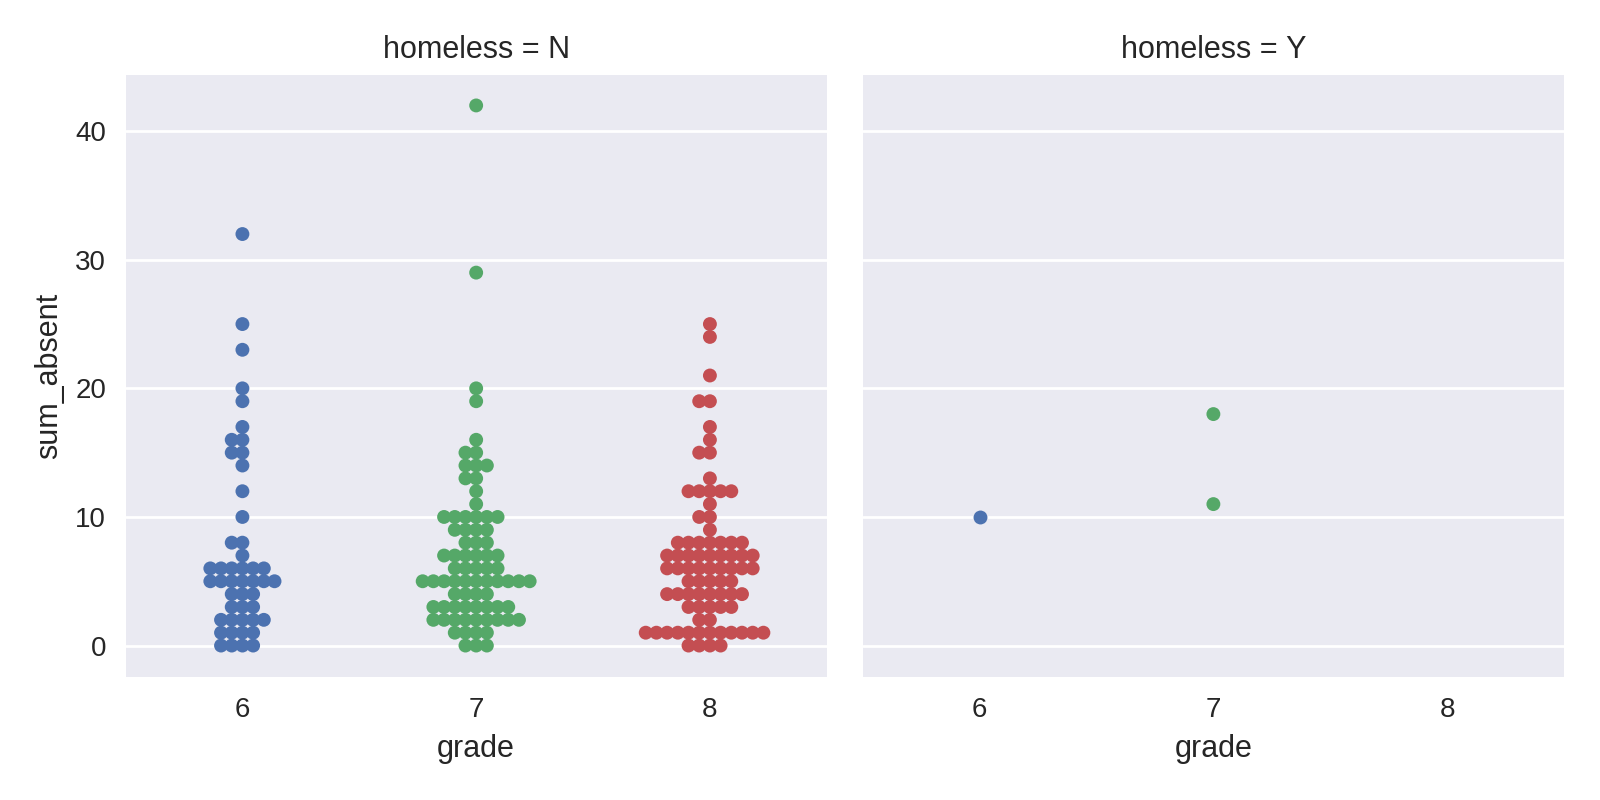

<IPython.core.display.Javascript object>


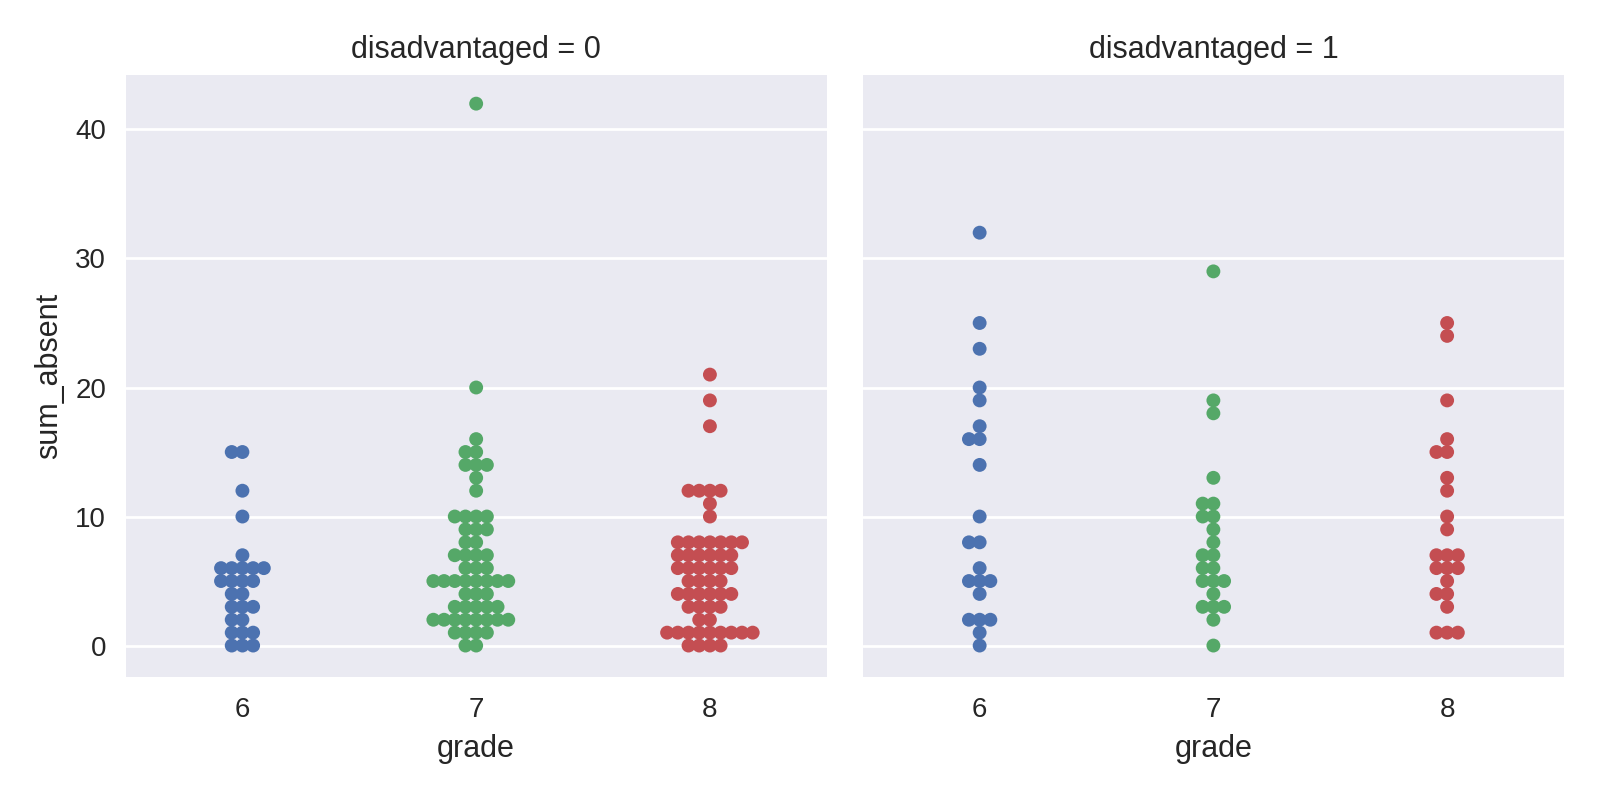

<IPython.core.display.Javascript object>


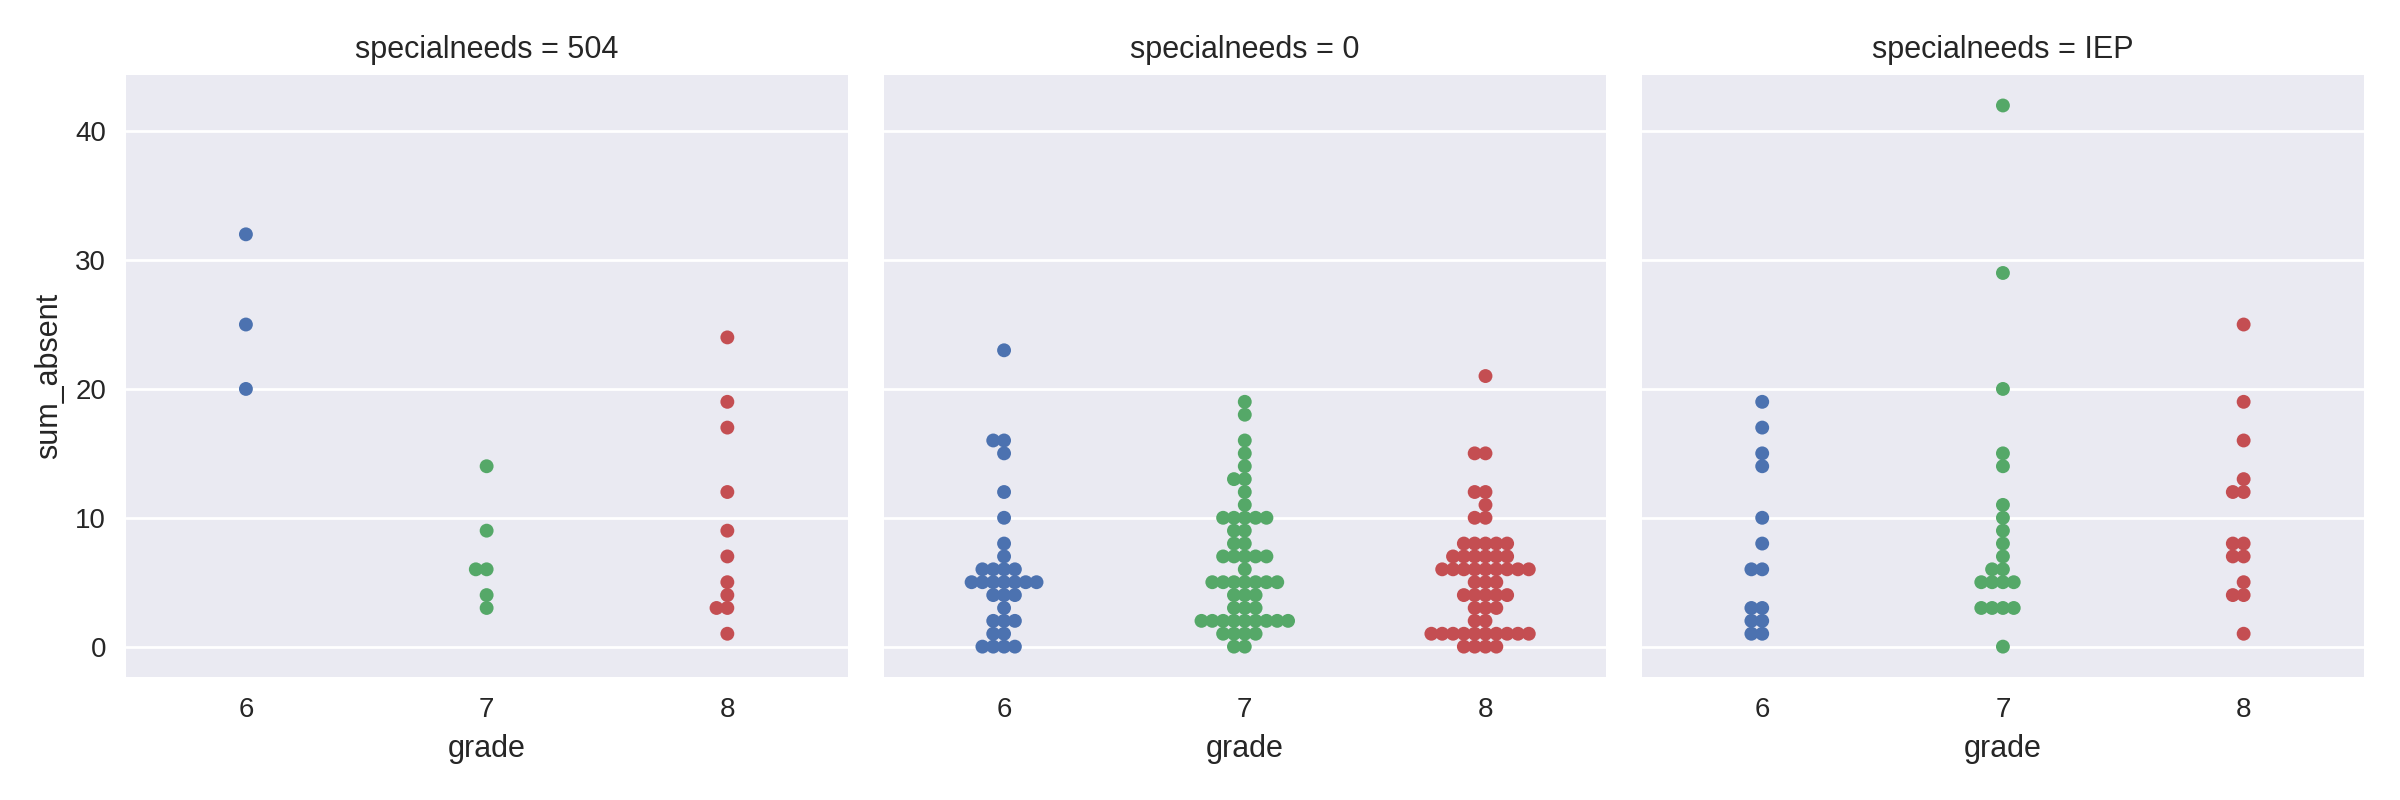

<IPython.core.display.Javascript object>


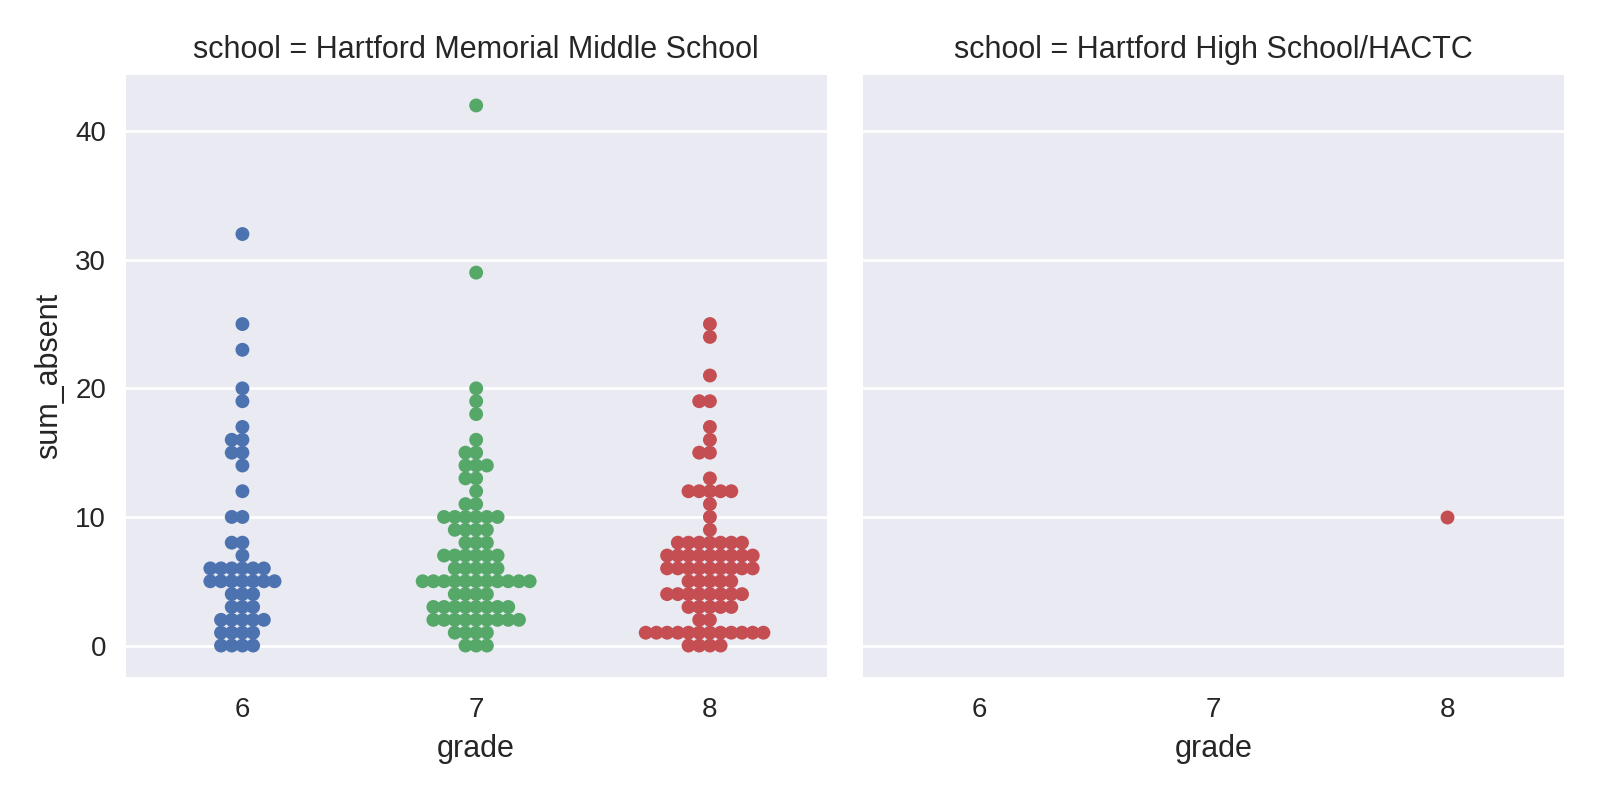

In [105]:
#middle school plots 
for p in ['sex', 'homeless', 'disadvantaged', 'specialneeds', 'school']:
    sns.factorplot(data=ms_students, x="grade", y="sum_absent",
               col=p, kind="swarm")

# Elementary School Analysis

In [102]:
#elementary school data set
grade1 = y1_data['grade'] == 1
grade2 = y1_data['grade'] == 2
grade3 = y1_data['grade'] == 3
grade4 = y1_data['grade'] == 4
grade5 = y1_data['grade'] == 5

es_students = y1_data.loc[grade1 | grade2 | grade3 | grade4 | grade5]

<IPython.core.display.Javascript object>


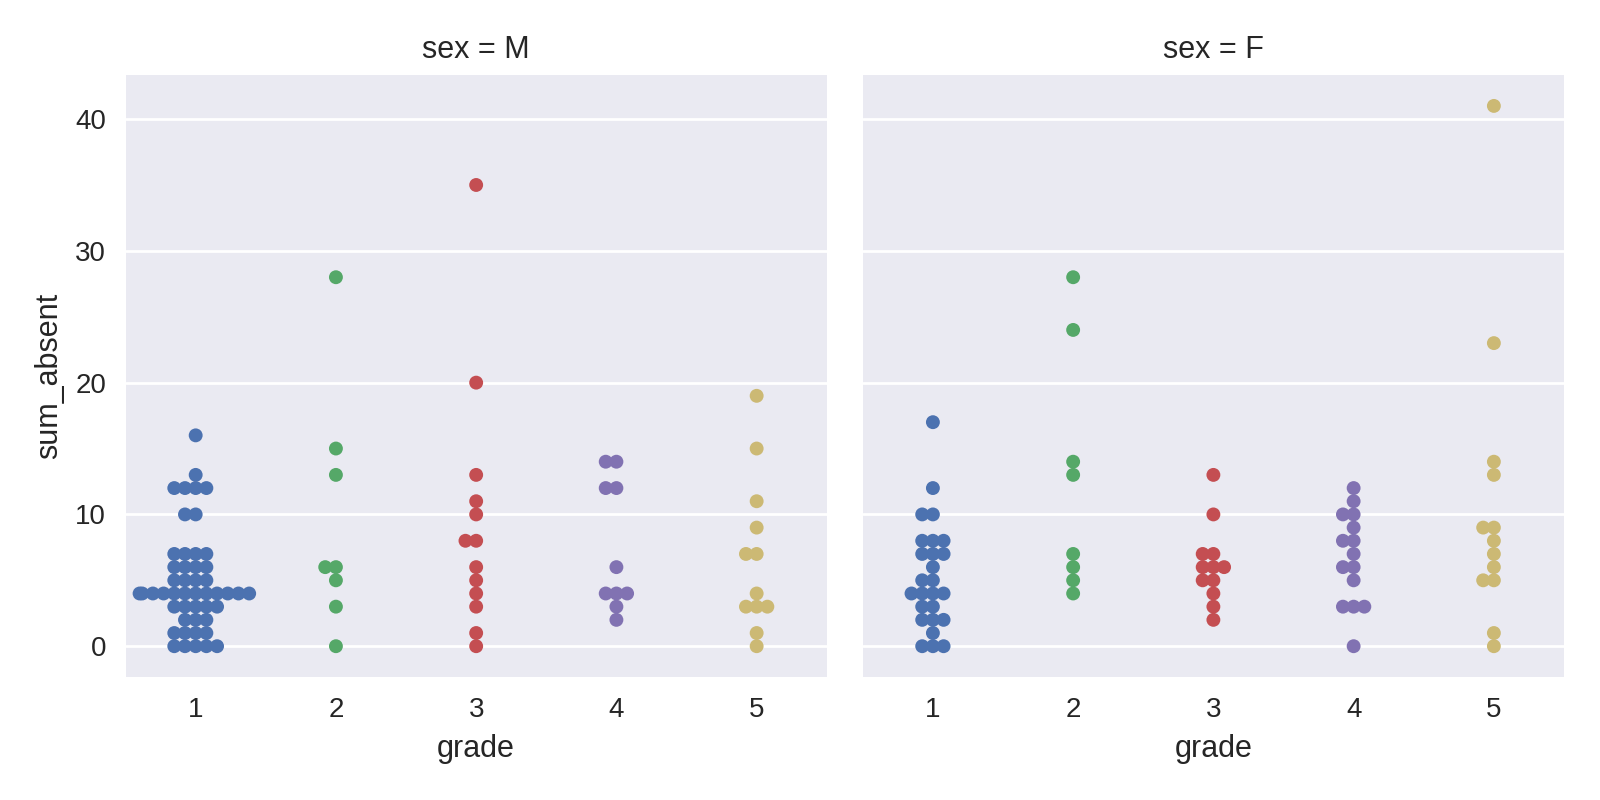

<IPython.core.display.Javascript object>


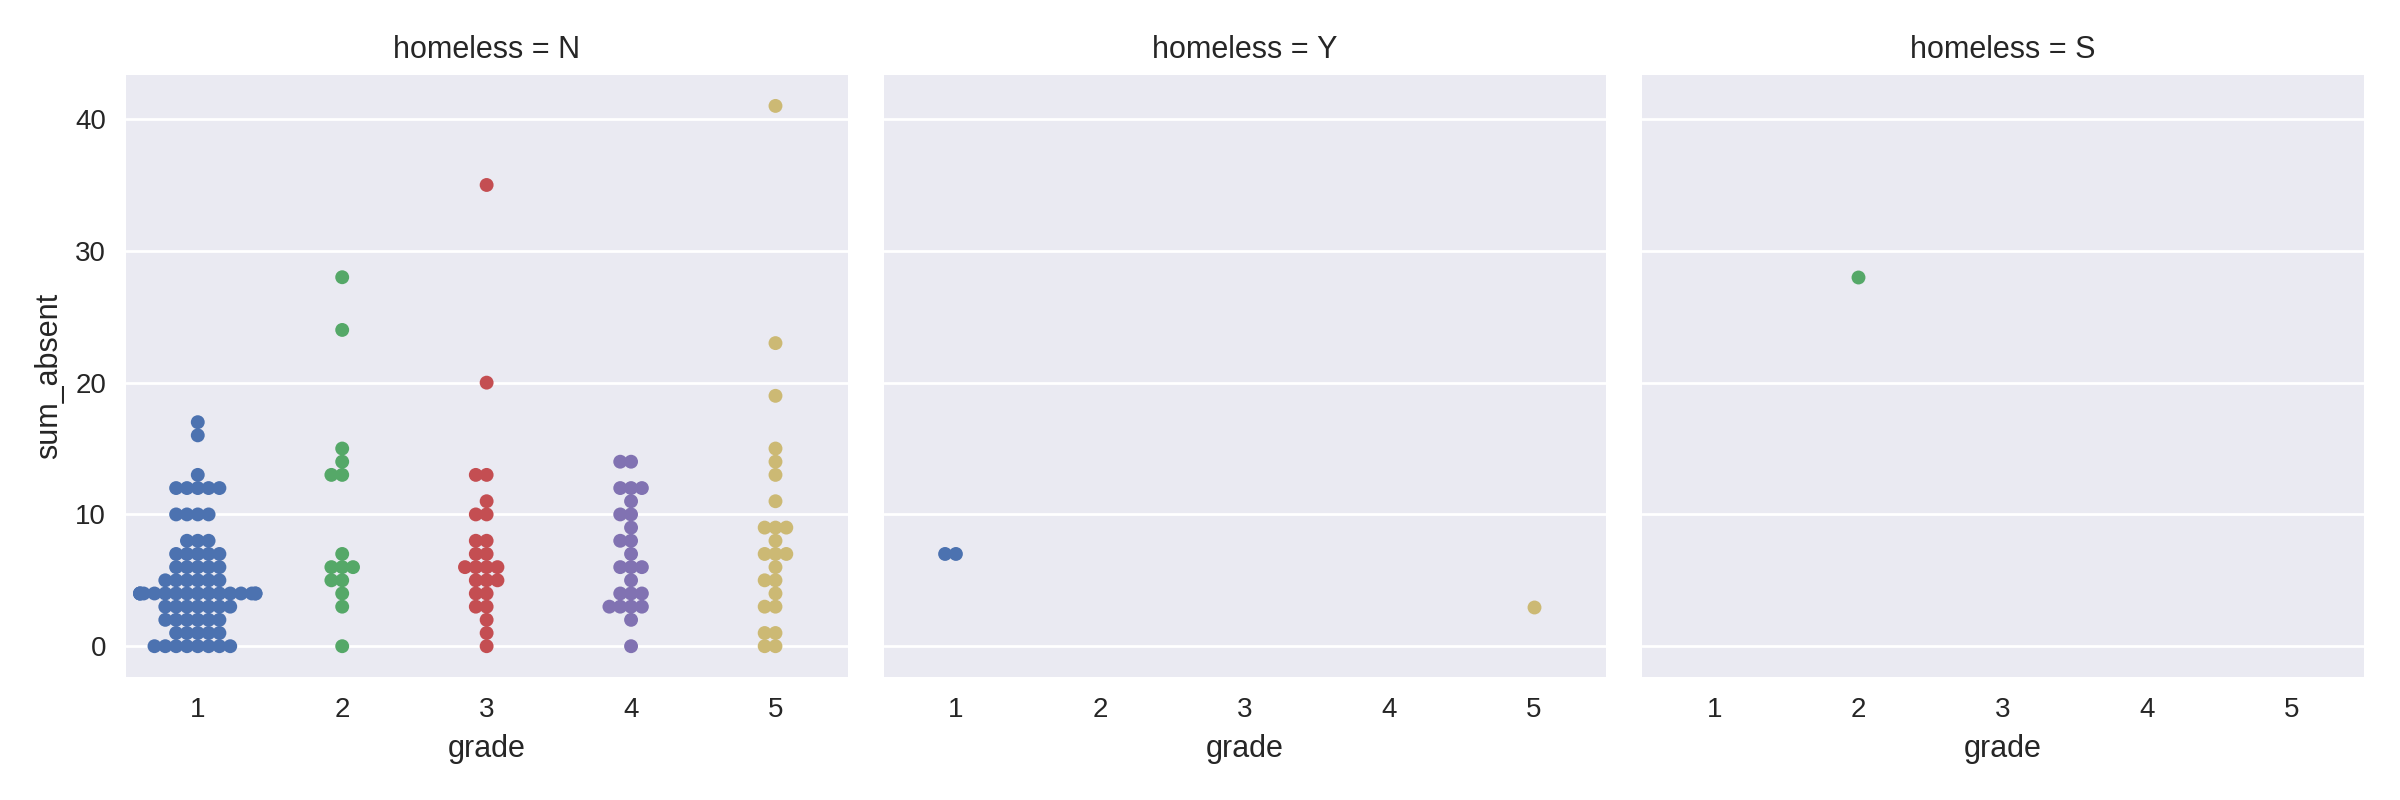

<IPython.core.display.Javascript object>


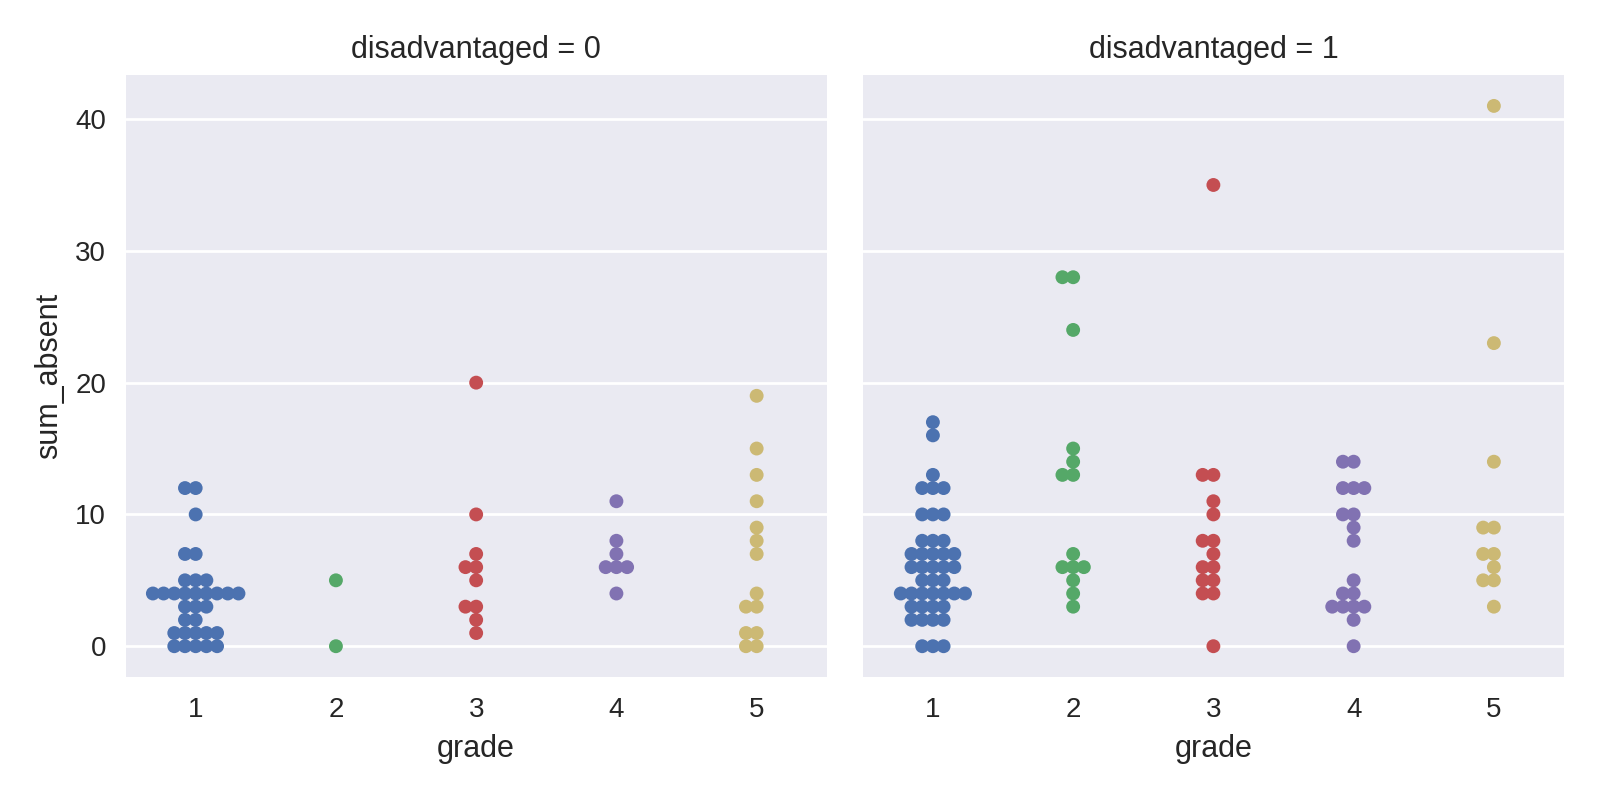

<IPython.core.display.Javascript object>


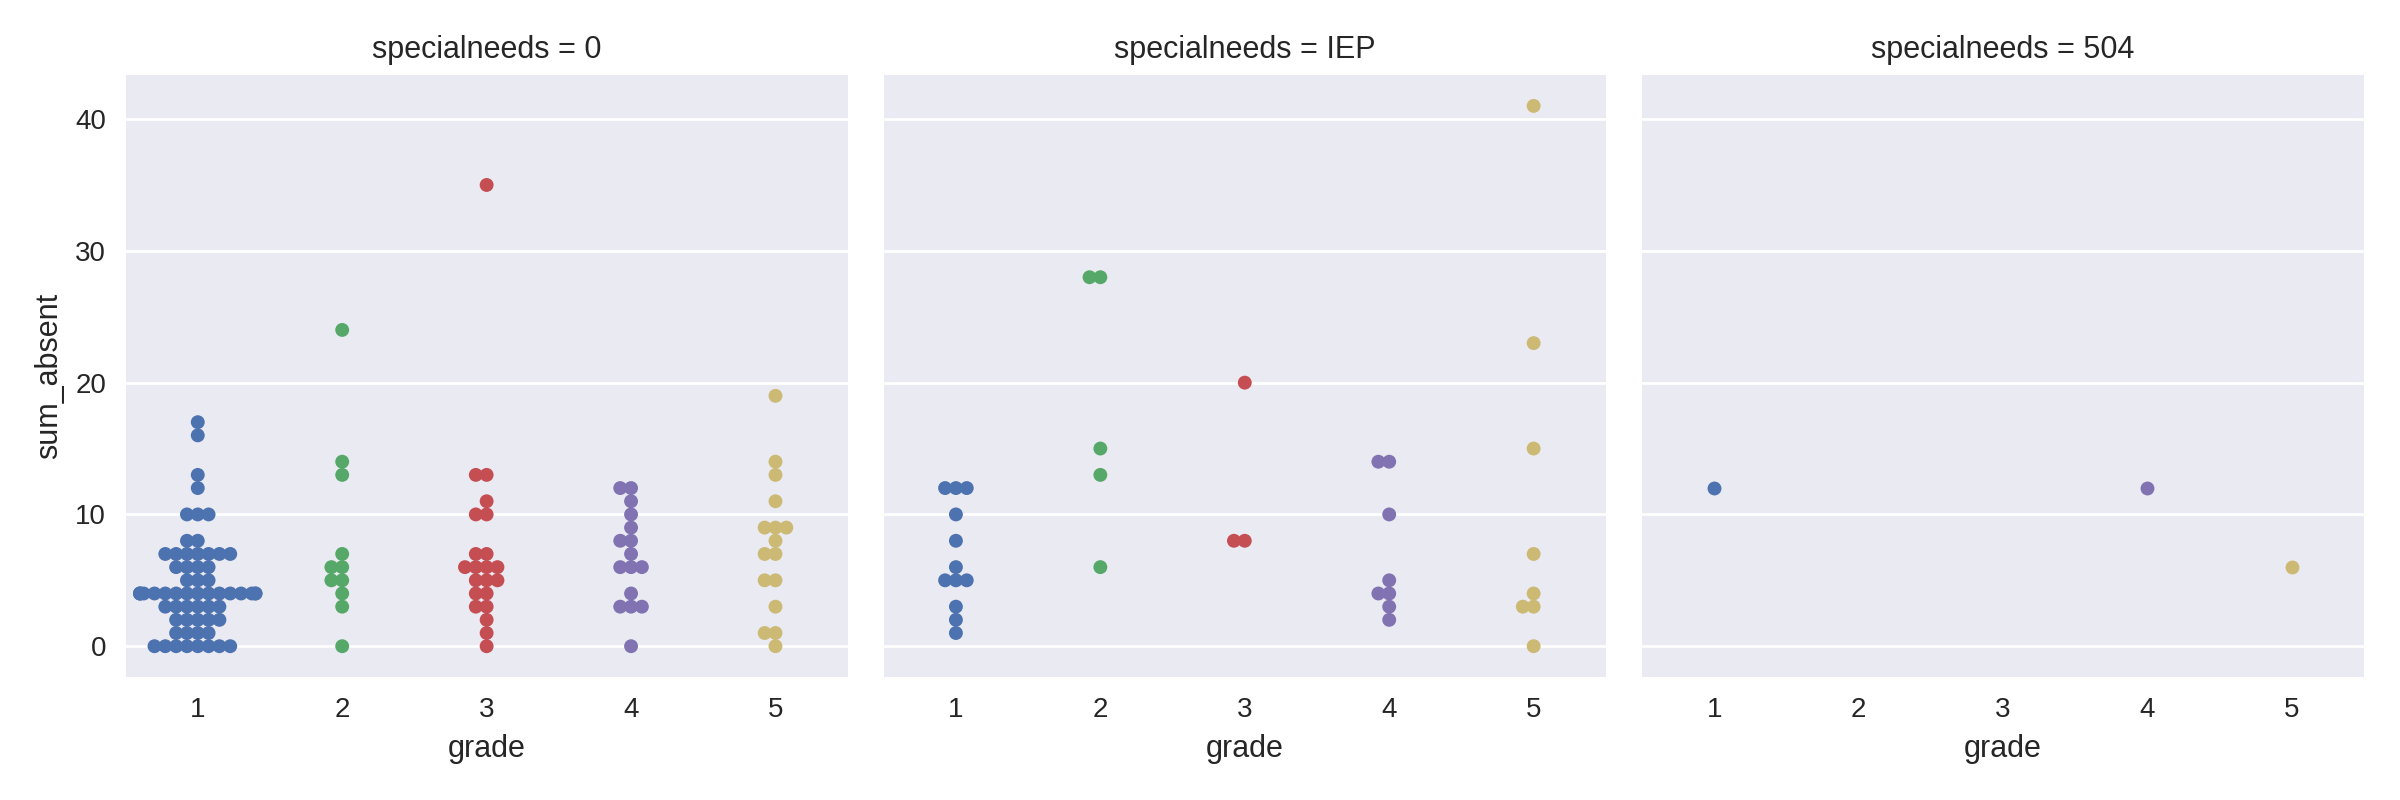

<IPython.core.display.Javascript object>


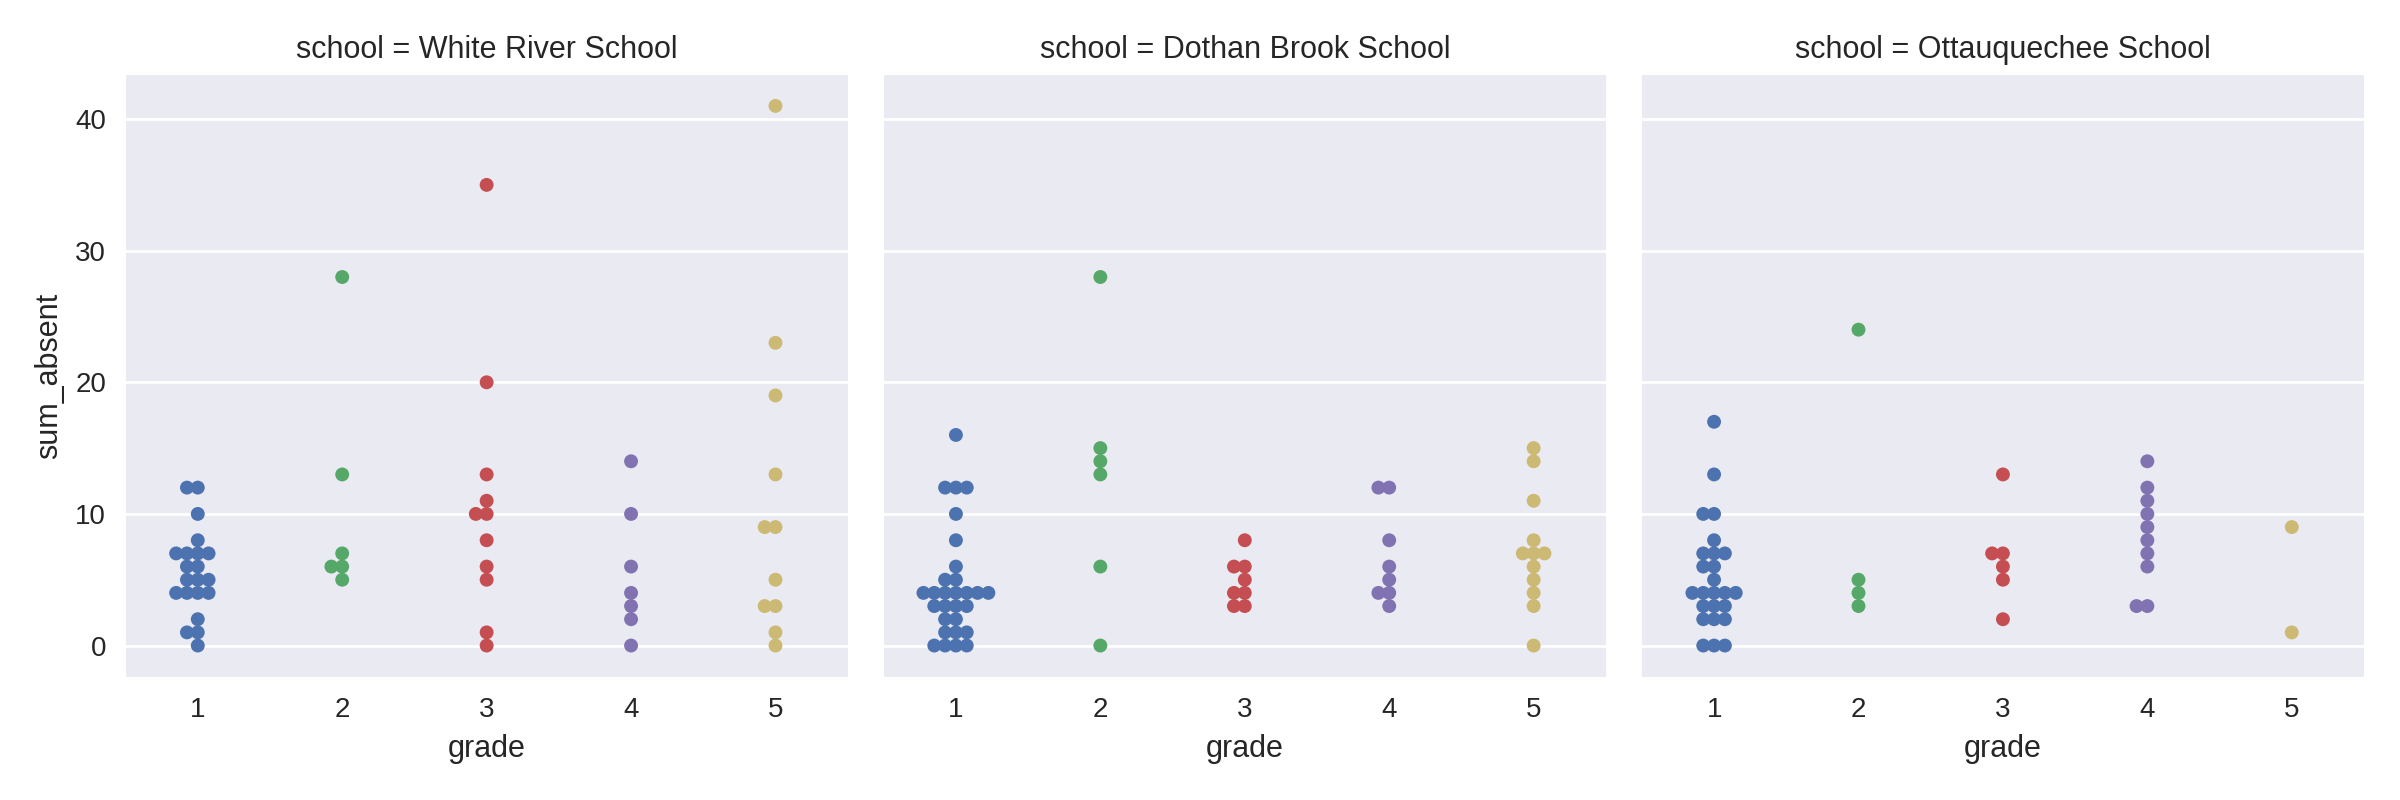

In [104]:
#elementary school plots 
for p in ['sex', 'homeless', 'disadvantaged', 'specialneeds', 'school']:
    sns.factorplot(data=es_students, x="grade", y="sum_absent",
               col=p, kind="swarm")